## Credit Card Fraud Detection

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Import libraries useful to our exploratoy data analysis

In [1]:
# import libraries

# pretty display of variables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec

import seaborn as sns; sns.set()
import datetime

import math

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

### Load data

In [2]:
#!dir "./data/raw"

In [3]:
transactions = pd.read_csv("./data/raw/creditcard.csv")

In [4]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
transactions.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
transactions.shape

(284807, 31)

In [7]:
# Checking if there is any missing value
transactions.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
str(datetime.timedelta(seconds=max(transactions.Time)-min(transactions.Time)))


'1 day, 23:59:52'

In [10]:
transactions.Class.value_counts() 

0    284315
1       492
Name: Class, dtype: int64

In [11]:
transactions.Class.value_counts() / transactions.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [12]:
transactions[transactions.Class==1 ][['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,492.000000,492.000000,492.0
mean,80746.806911,122.211321,1.0
std,47835.365138,256.683288,0.0
min,406.000000,0.000000,1.0
25%,41241.500000,1.000000,1.0
50%,75568.500000,9.250000,1.0
75%,128483.000000,105.890000,1.0
max,170348.000000,2125.870000,1.0


In [13]:
transactions[transactions.Amount==0 ].Class.value_counts() 

0    1798
1      27
Name: Class, dtype: int64

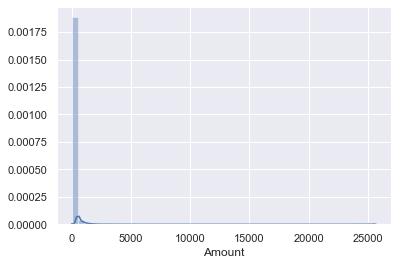

In [14]:
sns.distplot(transactions.Amount)

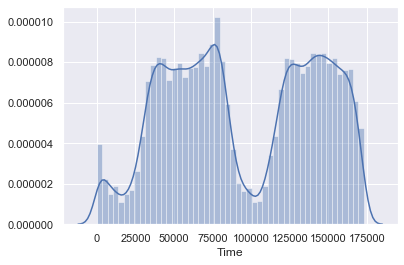

In [15]:
sns.distplot(transactions.Time)

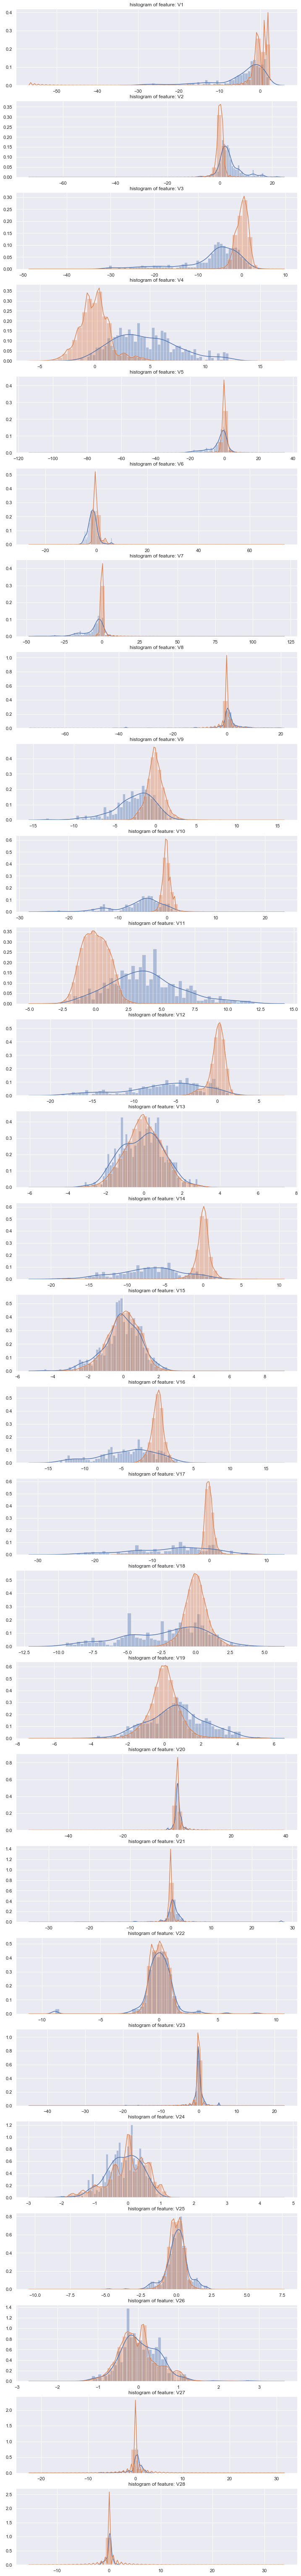

In [16]:
# distribution of unlabeled features
unlabeled_features  = transactions.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4));
gs = gridspec.GridSpec(28, 1);
for i, feature in enumerate(transactions[unlabeled_features]):
    ax = plt.subplot(gs[i]);
    sns.distplot(transactions[feature][transactions.Class == 1], bins=50);
    sns.distplot(transactions[feature][transactions.Class == 0], bins=50);
    ax.set_xlabel('');
    ax.set_title('histogram of feature: ' + str(feature));
plt.show();

In [17]:
 # Compute the correlation matrix

corr = transactions.drop(['Class'], axis=1).corr()

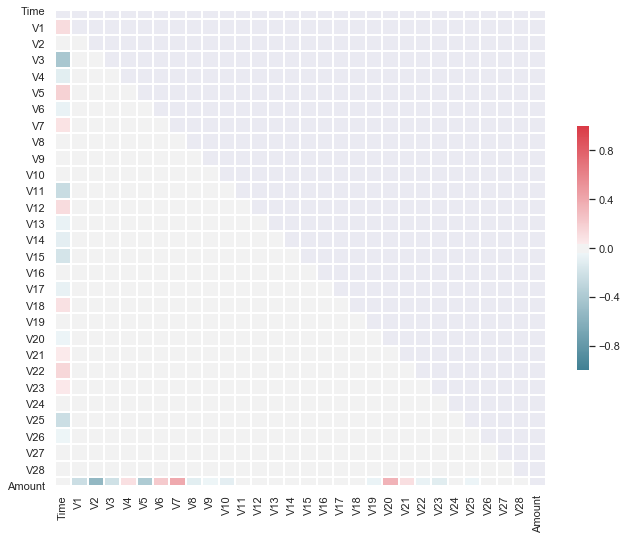

In [18]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .5});

The unlabelled features seems not corealated between them while V2, V5 and V7, V20 seems to be negatively and positively correlated with the feature Amount.

Divide the data values into features and target.

In [19]:
#separating the X and the Y from the dataset
X=transactions.drop(['Class'], axis=1)
Y=transactions['Class']
X.shape
Y.shape
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(284807, 30)

(284807,)

 Split the data into 80% training and 20% testing. 

In [20]:

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [21]:
# Building random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Random Forest model creation
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, Y_train)
# predictions
y_pred = rfc.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Accuracy, Recall, Precision, and F1 Score
Here are some reminders:  

##### Abbreviations

$TP = True\ Positive.$ Fraudulent transactions the model predicts as fraudulent.  
$TN = True\ Negative.$ Normal transactions the model predicts as normal.  
$FP = False\ Positive.$ Normal transactions the model predicts as fraudulent.  
$FN = False\ Negative.$ Fraudulent transactions the model predicts as normal.  

##### Accuracy
$Accuracy=\frac{TP+TN}{TP+TN+FP+FN}=\frac{All\ correct\ predictions}{All\ transactions}$  
Accuracy is one metric for evaluating classification models. **_It is the fraction of predictions the model gets right._** While accuracy might seem to be a good metric to measure how well a model performs, there is a huge downside when using it in this unbalanced dataset. If we were to say all 285,000 transactions were normal transactions (none fraudulent), we’d have a 99.8% accuracy! The problem here, however, is the obvious miss of all the fraudulent transactions. Especially for imbalanced datasets, there are more effective metrics to use.

##### Recall
$Recall=\frac{TP}{TP+FN}=\frac{Fraudulent\ transactions\ the\ model\ predicts\ as\ fraudulent}{All\ fraudulent\ transactions}$  
Recall answers the question: **_Out of the fraudulent transactions, what percentage of these are correctly identified by our model?_** In our best model, our recall is 89.9%. This means out of all of the data, it correctly identifies 89.9% of all fraudulent transactions. This could be improved but I feel it’s a good starting point.

##### Precision
$Precision=\frac{TP}{TP+FP}=\frac{Fraudulent\ transactions\ the\ model\ predicts\ as\ fraudulent}{All\ transactions\ predicted\ as\ fraudulent}$   
Precision answers the question: **_Out of all the transactions predicted to be fraudulent, what percentage were actually fraudulent?_** In our best model, 97.8% of all fraudulent transactions are captured. This is a really good metric!

##### F1 Score
$F1 Score=2*\frac{Recall*Precision}{Recall+Precision}$  
The F1 score combines Recall and Precision into one metric as a weighted average of the two. Unlike Recall and Precision individually, F1 takes both false positives and false negatives into consideration. In imbalanced classes such as this, F1 is much more effective than accuracy at determining the performance of the model.

##### The Matthews correlation coefficient
$MCC = \frac{TP * TN - FP * FN}{ \sqrt{(TP + FP) * (FN + TN) * (FP + TN) * (TP + FN)}}$  
The Matthews Correlation Coefficient (MCC) has a range of -1 to 1 where -1 indicates a completely wrong binary classifier while 1 indicates a completely correct binary classifier. 
The Matthews correlation coefficient takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes.

In [33]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
# fraud

print("Number of frauds  {}".format(len(transactions[transactions['Class'] == 1])))
print("Total number of errors  {}".format((y_pred != Y_test).sum()))
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

Number of frauds  492
Total number of errors  25
The model used is Random Forest classifier
The accuracy is  0.9995611109160493
The precision is 0.9620253164556962
The recall is 0.7755102040816326
The F1-Score is 0.8587570621468926
The Matthews correlation coefficient is 0.8635448920046104


[[56861     3]
 [   22    76]]


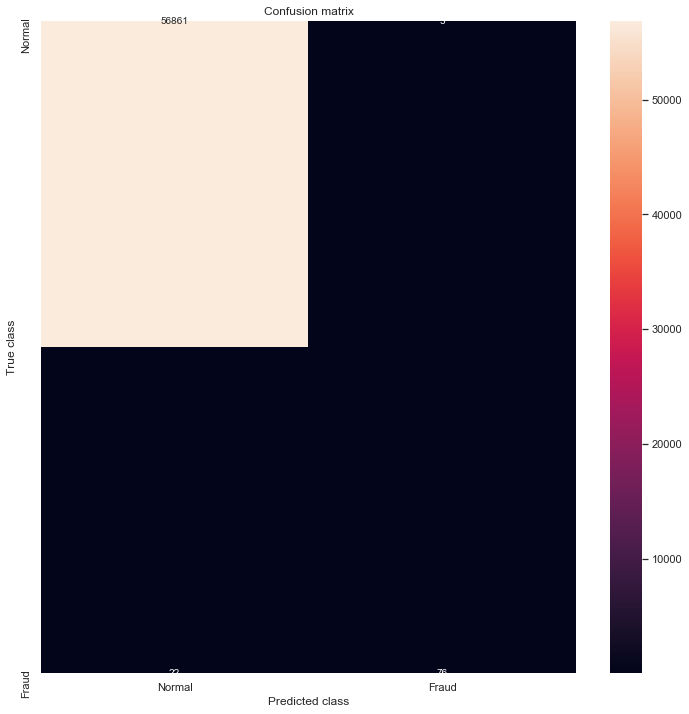

In [42]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud'];
conf_matrix = confusion_matrix(Y_test, y_pred);
print(conf_matrix)
plt.figure(figsize=(12, 12));
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix");
plt.ylabel('True class');
plt.xlabel('Predicted class');
plt.show();

##### Ressources:
- https://www.kaggle.com/mlg-ulb/creditcardfraud
- https://medium.com/analytics-vidhya/credit-card-fraud-detection-in-python-using-scikit-learn-f9046a030f50
- https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8
- https://towardsdatascience.com/credit-card-fraud-detection-a1c7e1b75f59
- https://github.com/limchiahooi/fraud-detection/blob/master/fraud-detection.ipynb
